In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN # KMeans and DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage # hierarchical clustering
from sklearn.decomposition import PCA # PCA

# K-Means Clustering

In [ ]:
geyser = pd.read_csv('oldfaithful.csv')
geyser.head()

,Eruption,Waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


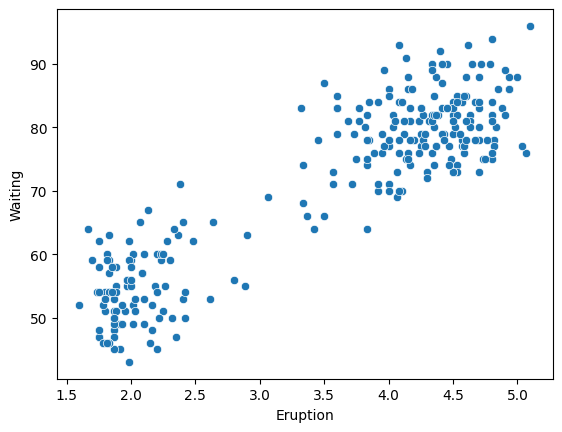

In [ ]:
sns.scatterplot(data=geyser, x='Eruption', y='Waiting');

In [ ]:
geyser.shape

(272, 2)

In [ ]:
kmeans_model = KMeans(n_clusters=2, max_iter=50000, n_init=1000) # create the model
kmeans_model = kmeans_model.fit(geyser) # fit or train the model

In [ ]:
centroids = kmeans_model.cluster_centers_ # centroids

In [ ]:
clusters = kmeans_model.fit_predict(geyser[['Eruption', 'Waiting']])

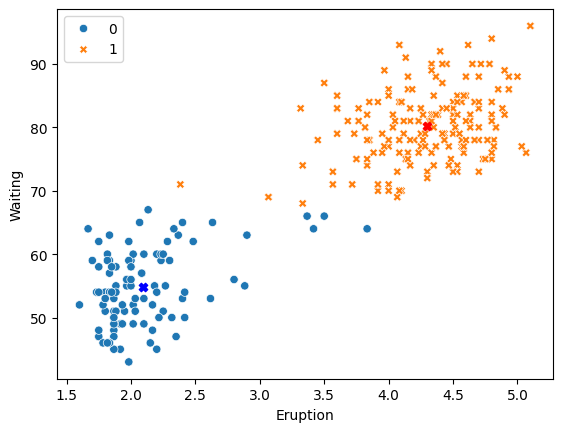

In [ ]:
# visualize the clusters and centroids
sns.scatterplot(data=geyser, x='Eruption', y='Waiting', hue=clusters, style=clusters);
 # centroid for cluster 1
plt.scatter(x=centroids[0,0], y=centroids[0,1], c='red', marker='X')
# centroid for cluster 2
plt.scatter(x=centroids[1,0], y=centroids[1,1], c='blue', marker='X')

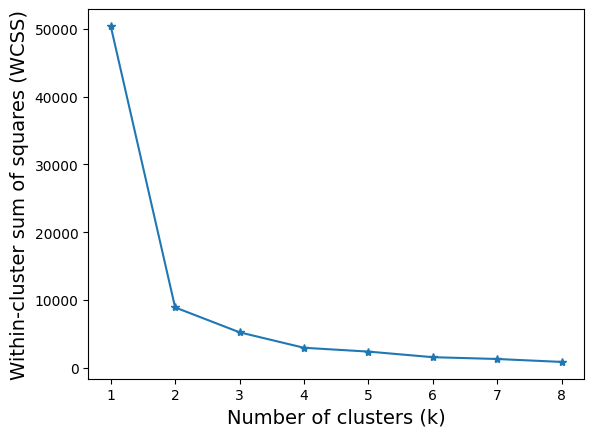

In [ ]:
# Elbow method

wcss_list = []
k = [1, 2, 3, 4, 5, 6, 7, 8]
for i in k:
  model = KMeans(n_clusters=i)
  model = model.fit(geyser)
  wcss_list.append(model.inertia_)

# plot the wcss for each cluster
ax=plt.figure().gca()
plt.plot(k, wcss_list, '*-')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14);

# Hierarchical Clustering - Aglometric method

In [ ]:
# compares the amino acid chain differences between mammals, birds,
# and reptile species
cytochrome = pd.read_csv('cytochrome.csv', header=None, usecols=range(1, 14))
cytochrome.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,12,10,11,10,9,10,13,14,11,15,18
1,1,0,11,9,10,9,8,11,12,13,10,14,17
2,12,11,0,3,6,5,6,7,11,13,10,11,14
3,10,9,3,0,3,2,4,6,9,11,8,9,11
4,11,10,6,3,0,3,5,7,10,11,8,9,12


In [ ]:
data = pd.read_csv('cytochrome.csv')
species = list(data.Human)
species.insert(0, 'Human')
species

['Human',
 'Monkey',
 'Horse',
 'Cow',
 'Dog',
 'Whale',
 'Rabbit',
 'Kangaroo',
 'Chicken',
 'Penguin',
 'Duck',
 'Turtle',
 'Frog']

In [ ]:
pd.DataFrame(data=cytochrome.to_numpy(), index=species, columns=species)

,Human,Monkey,Horse,Cow,Dog,Whale,Rabbit,Kangaroo,Chicken,Penguin,Duck,Turtle,Frog
Human,0,1,12,10,11,10,9,10,13,14,11,15,18
Monkey,1,0,11,9,10,9,8,11,12,13,10,14,17
Horse,12,11,0,3,6,5,6,7,11,13,10,11,14
Cow,10,9,3,0,3,2,4,6,9,11,8,9,11
Dog,11,10,6,3,0,3,5,7,10,11,8,9,12
Whale,10,9,5,2,3,0,2,6,9,10,7,8,11
Rabbit,9,8,6,4,5,2,0,6,8,9,6,9,11
Kangaroo,10,11,7,6,7,6,6,0,12,11,10,11,13
Chicken,13,12,11,9,10,9,8,12,0,3,3,8,11
Penguin,14,13,13,11,11,10,9,11,3,0,4,9,13


In [ ]:
from scipy.spatial.distance import squareform

cytochrome = squareform(cytochrome)

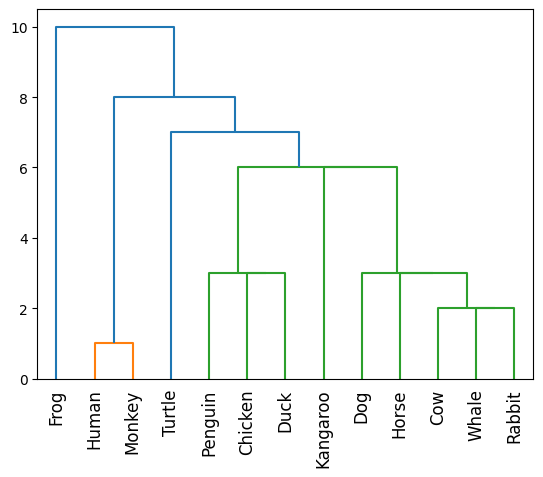

In [ ]:
# Single linkage

single_cluster = linkage(cytochrome, method='single')
dendrogram(single_cluster, labels=species, leaf_rotation=90);

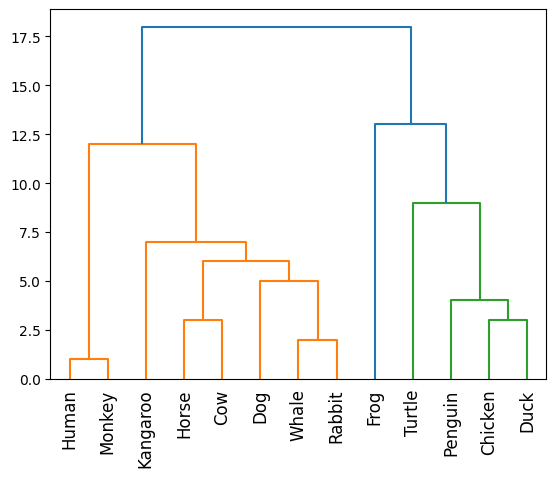

In [ ]:
# complete linkage

complete_cluster = linkage(cytochrome, method='complete')
dendrogram(complete_cluster, labels=species, leaf_rotation=90);

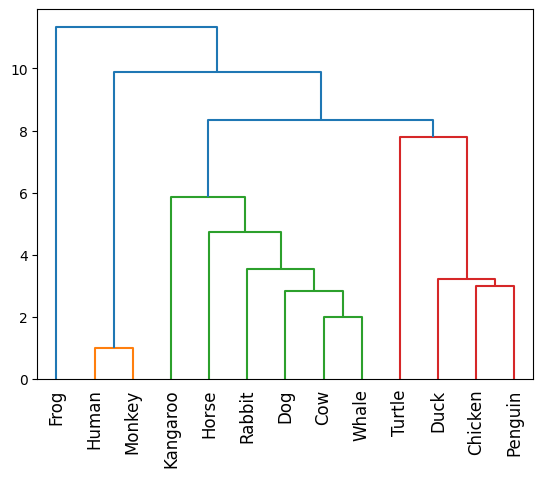

In [ ]:
# centroid linkage

centroid_cluster = linkage(cytochrome, method='centroid')
dendrogram(centroid_cluster, labels=species, leaf_rotation=90);

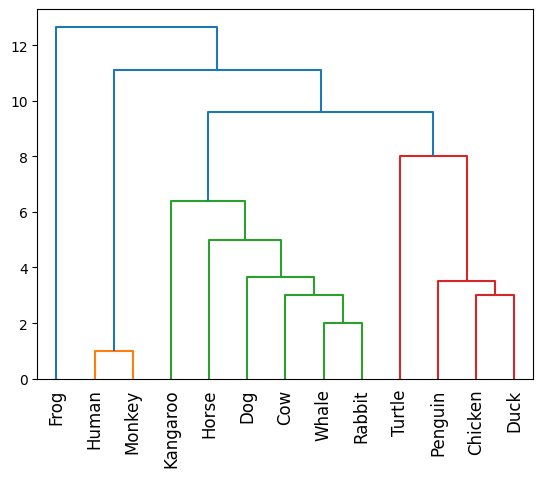

In [ ]:
# average linkage

average_cluster = linkage(cytochrome, method='average')
dendrogram(average_cluster, labels=species, leaf_rotation=90);

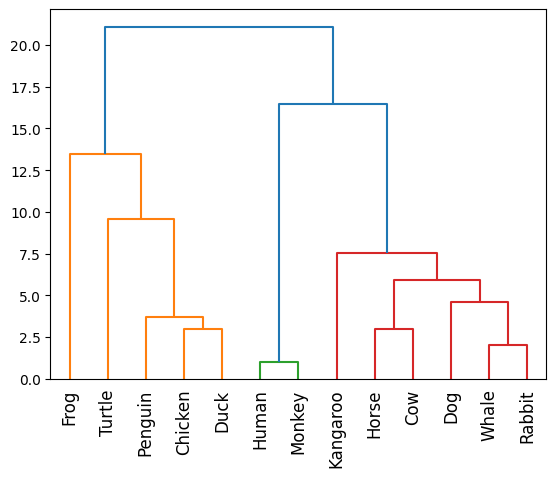

In [ ]:
# ward linkage - read more

ward_cluster = linkage(cytochrome, method='ward')
dendrogram(ward_cluster, labels=species, leaf_rotation=90);

# DBSCAN

In [ ]:
homes = pd.read_csv('homes.csv')
homes.head()

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0


In [ ]:
homes.describe()

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,DAc,DEd,DHa,DAd,DCr,DPa
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,285.796053,1.970395,3.986842,2.207895,3.447368,7.672368,1969.407895,-0.059211,5.449868,1.565789,0.328947,0.157895,0.184211,0.039474,0.078947,0.197368
std,22.083176,60.333216,0.212420,1.653227,0.570325,0.737468,2.764663,23.492511,2.349251,8.206546,0.771760,0.472953,0.367065,0.390232,0.196013,0.271448,0.400657
min,1.000000,155.500000,1.440000,1.000000,1.000000,2.000000,2.000000,1905.000000,-6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.750000,242.750000,1.860750,3.000000,2.000000,3.000000,6.000000,1957.750000,-1.225000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.500000,276.000000,1.966500,4.000000,2.000000,3.000000,6.300000,1969.500000,-0.050000,1.220000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.250000,336.750000,2.107500,5.000000,3.000000,4.000000,9.000000,1980.000000,1.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,76.000000,450.000000,2.896000,11.000000,3.100000,6.000000,15.000000,2005.000000,3.500000,42.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
homes_pf = homes[['Price', 'Floor']]
homes_pf.head()

,Price,Floor
0,388.0,2.180
1,450.0,2.054
2,386.0,2.112
3,350.0,1.442
4,155.5,1.800


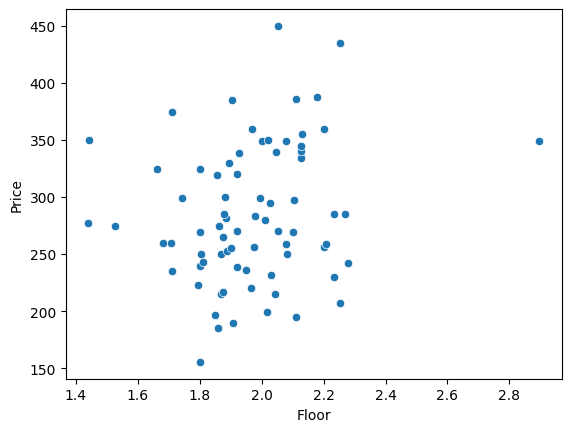

In [ ]:
sns.scatterplot(data=homes_pf, x='Floor', y='Price');

In [ ]:
# scale the dataset
scaler = StandardScaler()
scaled_homes = scaler.fit_transform(homes_pf)
scaled_homes = pd.DataFrame(scaled_homes, columns=['Price', 'Floor'])
scaled_homes.head()

,Price,Floor
0,1.705247,0.993306
1,2.739702,0.396200
2,1.671878,0.671058
3,1.071227,-2.504029
4,-2.173957,-0.807490


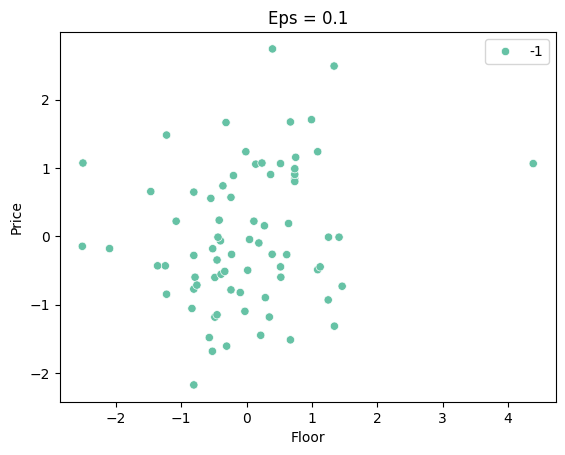

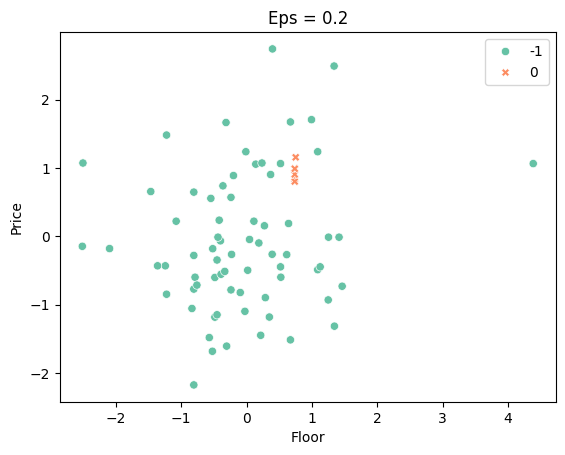

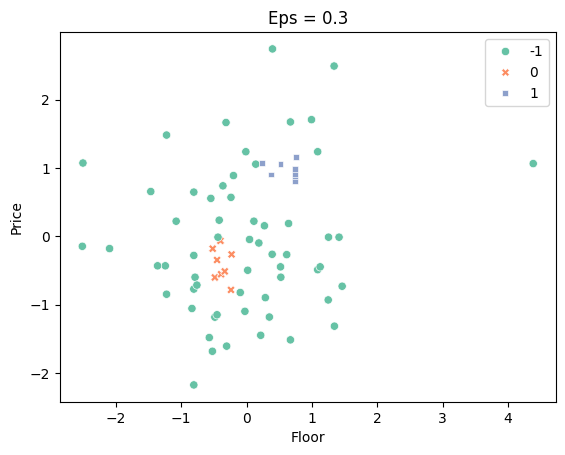

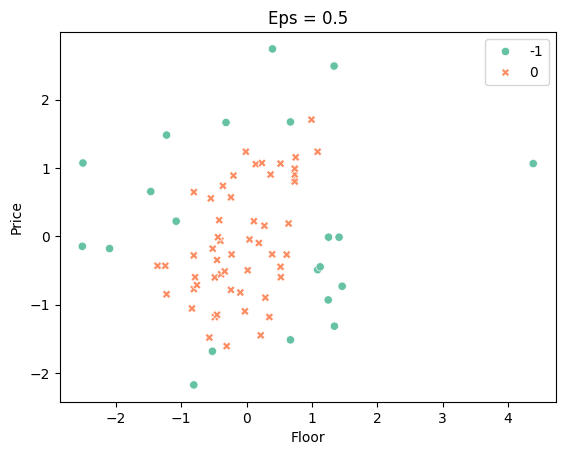

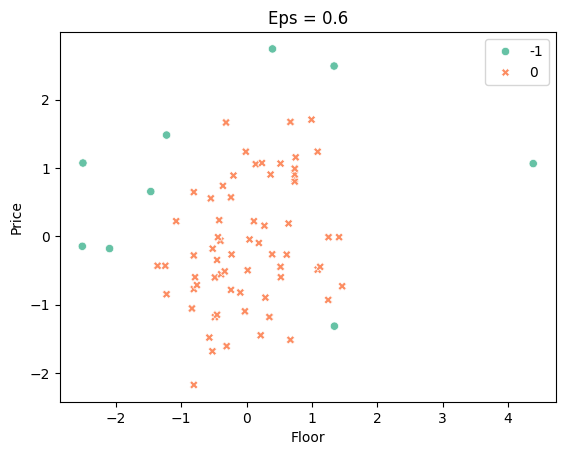

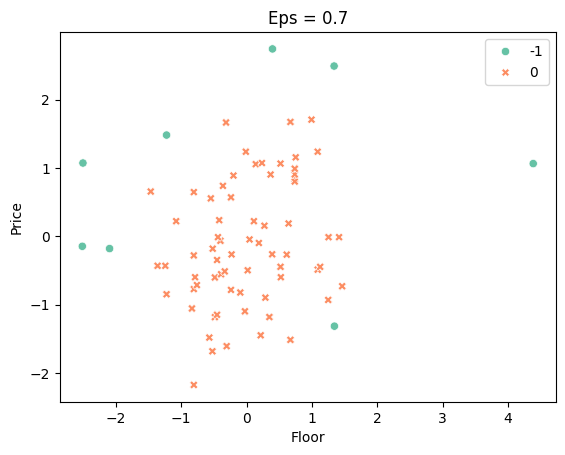

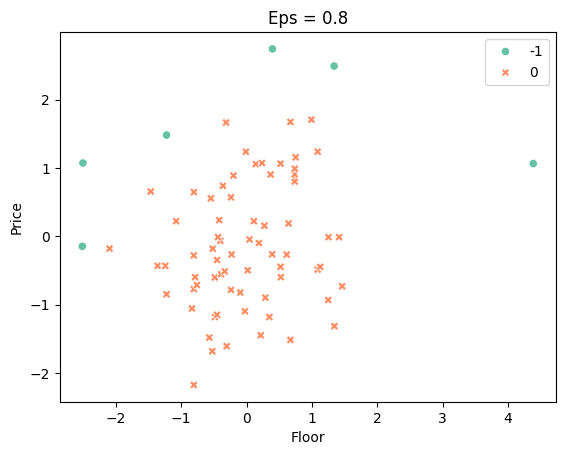

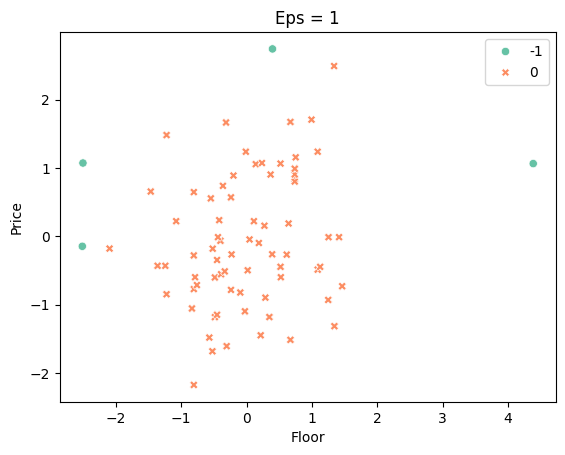

In [ ]:
# use DBSCAN to detect outliers
eps_list = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1]
for i in eps_list:
  dbscan_model = DBSCAN(eps=i, min_samples=6)
  dbscan_model = dbscan_model.fit(scaled_homes)
  clusters = dbscan_model.fit_predict(scaled_homes)
  sns.scatterplot(data=scaled_homes, x='Floor', y='Price', hue=clusters, style=clusters,
                  palette='Set2');
  plt.title('Eps = '+str(i))
  plt.show();

In [ ]:
best_dbscan_model = DBSCAN(eps=0.7, min_samples=6)
best_dbscan_model = best_dbscan_model.fit(scaled_homes)
clusters = best_dbscan_model.fit_predict(scaled_homes)

outliers = scaled_homes[clusters == -1]
outliers

,Price,Floor
1,2.739702,0.396200
3,1.071227,-2.504029
7,-1.314692,1.343987
17,-0.180129,-2.096480
19,-0.146760,-2.513507
63,1.480003,-1.224516
73,2.489430,1.339248
75,1.062884,4.386384


In [ ]:
homes[clusters == -1]

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
7,8,207.0,2.254,4,2.0,4,8.0,1961,-0.9,0.81,2,Sold,0,Parker,0,0,0,0,1
17,18,275.0,1.528,3,2.1,3,6.3,1975,0.5,0.25,2,Active,1,Redwood,0,0,0,0,0
19,20,277.0,1.440,3,2.0,3,6.0,1948,-2.2,4.84,2,Active,1,Edison,1,0,0,0,0
63,64,374.5,1.712,5,1.1,3,3.3,1908,-6.2,38.44,2,Pending,0,Edison,1,0,0,0,0
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
75,76,349.5,2.896,4,3.0,5,15.0,1979,0.9,0.81,2,Active,1,Crest,0,0,0,1,0


# PCA

In [ ]:
rock = pd.read_csv('rock.csv')
rock.head()

,Area,Perimeter,Shape,Permeability
0,4990,2791.90,0.090330,6.3
1,7002,3892.60,0.148622,6.3
2,7558,3930.66,0.183312,6.3
3,7352,3869.32,0.117063,6.3
4,7943,3948.54,0.122417,17.1


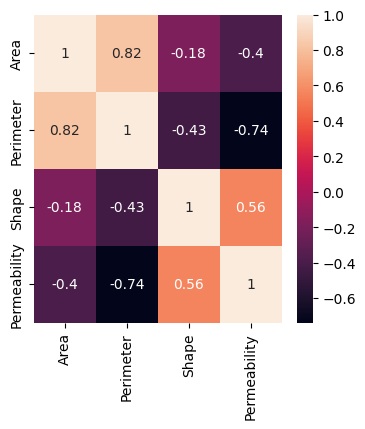

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(rock.corr(), annot=True);


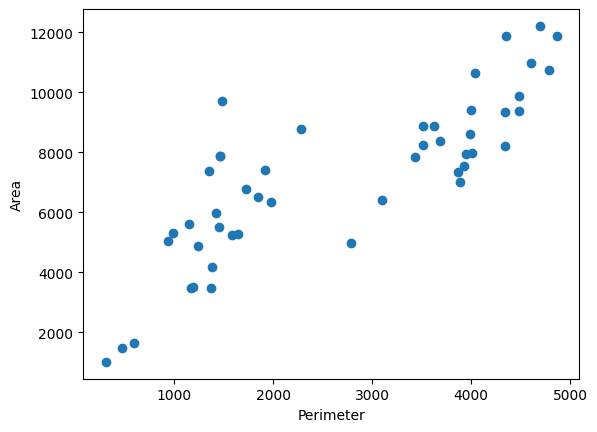

In [ ]:
plt.scatter(rock['Perimeter'], rock['Area'])
plt.xlabel('Perimeter')
plt.ylabel('Area');

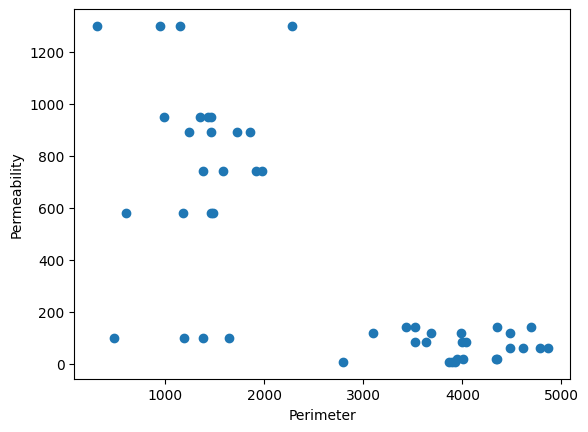

In [ ]:
plt.scatter(rock['Perimeter'], rock['Permeability'])
plt.xlabel('Perimeter')
plt.ylabel('Permeability');

In [ ]:
rock_scaled = scaler.fit_transform(rock)
rock_scaled = pd.DataFrame(rock_scaled, columns=rock.columns)
rock_scaled.head()

,Area,Perimeter,Shape,Permeability
0,-0.827538,0.077427,-1.546569,-0.944410
1,-0.069935,0.854390,-0.841039,-0.944410
2,0.139423,0.881256,-0.421176,-0.944410
3,0.061855,0.837957,-1.223007,-0.944410
4,0.284391,0.893877,-1.158206,-0.919481


In [ ]:
# create and fit the PCA model

pca_model = PCA(n_components=len(rock.columns))
pca_model.fit(rock_scaled)
X_pca = pca_model.transform(rock_scaled)
X_pca.shape

(48, 4)

In [ ]:
# explained variance by each component
pca_model.explained_variance_

array([2.66447132, 0.94255618, 0.40448323, 0.07359565])

In [ ]:
# percentage of variance explained by each component
pca_model.explained_variance_ratio_

array([0.65224037, 0.2307299 , 0.09901413, 0.0180156 ])

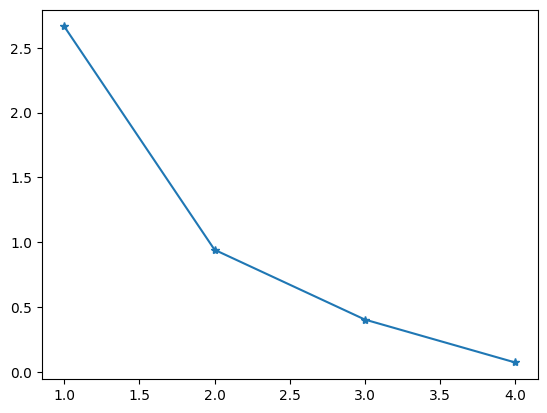

In [ ]:
plt.plot([1, 2, 3, 4], pca_model.explained_variance_, '*-');

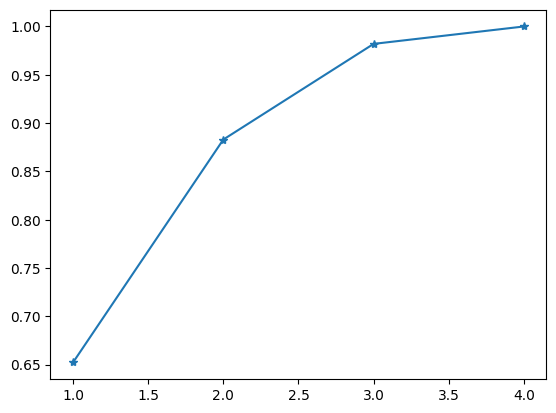

In [ ]:
cum_sum = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot([1, 2, 3, 4], cum_sum, '*-');

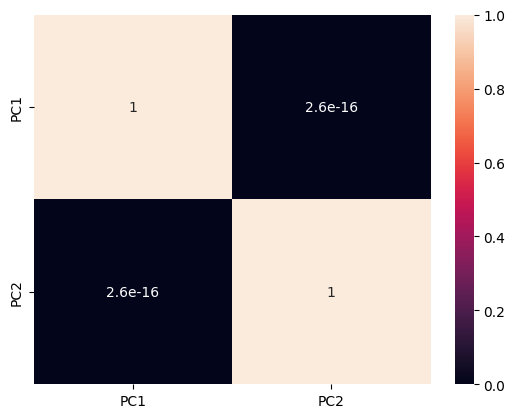

In [ ]:
final_data = X_pca[:, [0, 1]]
final_data = pd.DataFrame(final_data, columns=['PC1', 'PC2'])
sns.heatmap(final_data.corr(), annot=True);

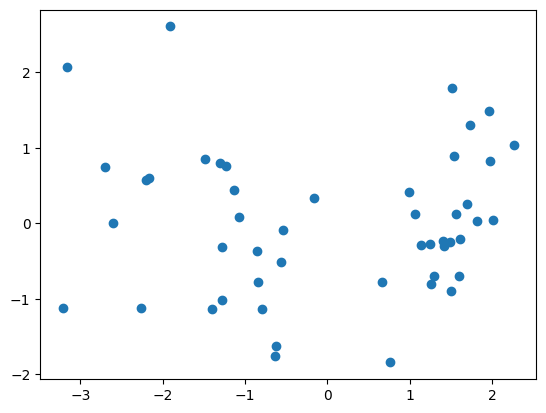

In [ ]:
plt.scatter(final_data['PC1'], final_data['PC2'])

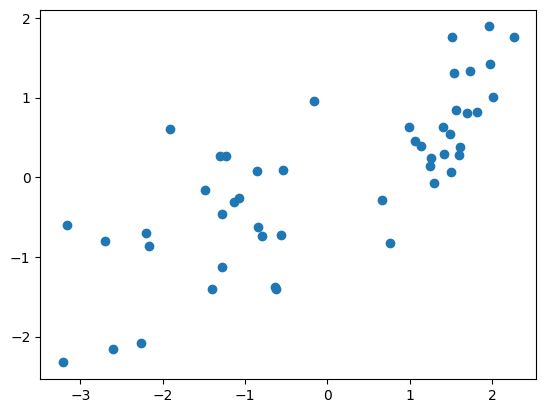

In [ ]:
plt.scatter(final_data['PC1'], rock_scaled['Area']);

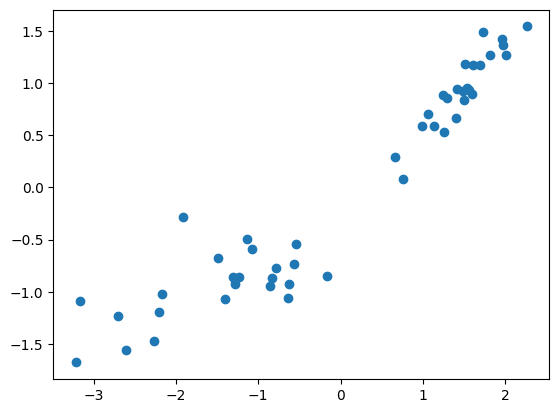

In [ ]:
plt.scatter(final_data['PC1'], rock_scaled['Perimeter']);

In [ ]:
final_data

,PC1,PC2
0,0.755305,-1.841478
1,1.294640,-0.701850
2,1.244676,-0.272732
3,1.497691,-0.895506
4,1.597658,-0.694925
5,1.417288,-0.295406
6,1.691020,0.261920
7,1.611290,-0.212062
8,1.057603,0.123464
9,0.660009,-0.774307
